# Using the Adaboost agent for structure discovery

In [15]:
# Copyright Toyota Research Institute 2019
from camd.campaigns.base import Campaign
from sklearn.neural_network import MLPRegressor
from camd.agent.stability import AgentStabilityAdaBoost
from camd.analysis import StabilityAnalyzer
from camd.experiment.base import ATFSampler
from camd.utils.data import load_default_atf_data
import os
import shutil

Load dataset - this default dataset contains all of the OQMD binary compounds, including Composition (or reduced_formula), delta_e (formation_energy_per_atom), and features computed according to Ward et al. (2017).

In [7]:
df = load_default_atf_data()

In [9]:
df[['Composition', 'delta_e']].head()

,Composition,delta_e
15232,Tb2Se3,-1.618293
310747,Pr3Os,0.322557
17129,Tl2Pt,-0.062342
310689,Gd3F,-0.196685
1103653,RbGe,0.868843


In [20]:
##########################################################
# Binary stable material discovery 50:50 explore/exploit agent
##########################################################
n_seed = 200  # Starting sample size - a seed of this size will be randomly chosen.
n_query = 20  # This many new candidates are "calculated with DFT" (i.e. requested from Oracle -- DFT)
agent = AgentStabilityAdaBoost(
    model=MLPRegressor(hidden_layer_sizes=(40, 20)),
    n_query=n_query,
    hull_distance=0.05,
    uncertainty=True,
    exploit_fraction=0.5,
    n_estimators=10
)
analyzer = StabilityAnalyzer(hull_distance=0.05)
experiment = ATFSampler(dataframe=df)
candidate_data = df

In [21]:
# Usually takes ~10 minutes
path = os.path.join(os.getcwd(), "adaboost_structure_discovery")
shutil.rmtree(path, ignore_errors=True)
os.makedirs(path)
new_loop = Campaign(
    candidate_data, agent, experiment, analyzer,
    create_seed=n_seed, path=path
)
new_loop.auto_loop(n_iterations=4, initialize=True)

Campaign initialization state: Agent RandomAgent hypothesizing
Campaign 0 state: Running experiments
Iteration: 0
Campaign 0 state: Getting new results
Campaign 0 state: Analyzing results
/Users/josephmontoya/PycharmProjects/camd/camd_public/camd/analysis.py:505: UserWarning: Number of elements too high for phase diagram plotting
  warnings.warn("Number of elements too high for phase diagram plotting")
Campaign 0 state: Agent AgentStabilityAdaBoost hypothesizing
Campaign 0 state: Running experiments
  Waiting for next round ...
Iteration: 1
Campaign 1 state: Getting new results
Campaign 1 state: Analyzing results
/Users/josephmontoya/PycharmProjects/camd/camd_public/camd/analysis.py:505: UserWarning: Number of elements too high for phase diagram plotting
  warnings.warn("Number of elements too high for phase diagram plotting")
Campaign 1 state: Agent AgentStabilityAdaBoost hypothesizing
Campaign 1 state: Running experiments
  Waiting for next round ...
Iteration: 2
Campaign 2 state: Ge

In [26]:
new_loop.history

,new_candidates,new_discovery,total_discovery
0,200,108,108
1,20,15,29
2,20,9,27
3,20,10,32
4,20,10,32


<AxesSubplot:>

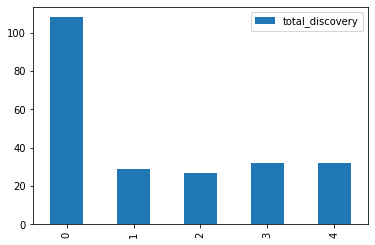

In [31]:
new_loop.history.plot.bar(y='total_discovery')
